# Data Cleaning Script
#### Team 3: Austin Knighton, Keri Broughton, Cameron Bowden, Brenden Volk

This script contains data cleaning on our dataset sourced from Kaggle. The goal of our project is to identify customers that will likely default when applying for consumer loan products, particularly in emerging markets such as India. All values within each variable were collected at the time of the loan application. The risk flag variable indicates whether there has been a defaul in the past or not. 

### Import Libraries 

## Install SMOTE for balancing data "pip3 install imblearn"

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve, f1_score
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

### Load and Read Data

In [2]:
LoanDF = pd.read_csv("Training Data.csv")
LoanDF.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
#View data shape
LoanDF.shape

(252000, 13)

This dataset contains 252,000 rows and 13 columns. 

In [4]:
#View values stored within each variable
LoanDF.info

<bound method DataFrame.info of             Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0

In [5]:
#View non-null count and data type
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
#View summary statistics for numeric variables
LoanDF.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


[]

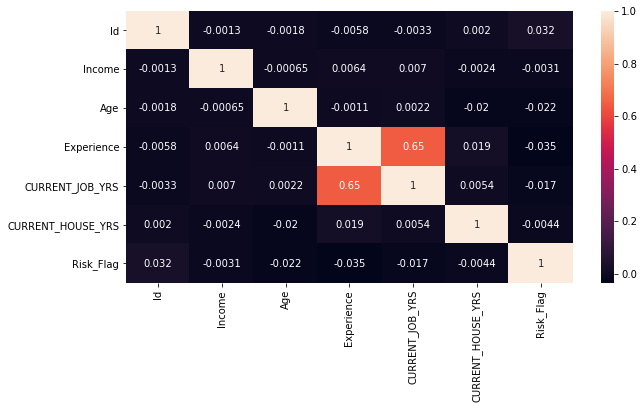

In [7]:
#View correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(LoanDF.corr(), annot=True)
plt.plot()

This correlation matrix shows that the variables 'experience' and 'current job years' have multi-collinearity. Therefore, we will need to eliminate the variable that has a weaker correlation with the risk flag. We decided to eliminate 'current job years' because the correlation with the risk flag is close to zero at 0.017. We will also eliminate 'current house years' because it has very low correlation with risk flag. We will leave income in for now. This correlation matrix does not show the categorical variables that will need to be converted into dummy codes. 

### Data Cleaning

In [8]:
#Check for null values
LoanDF.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

##### Visualization

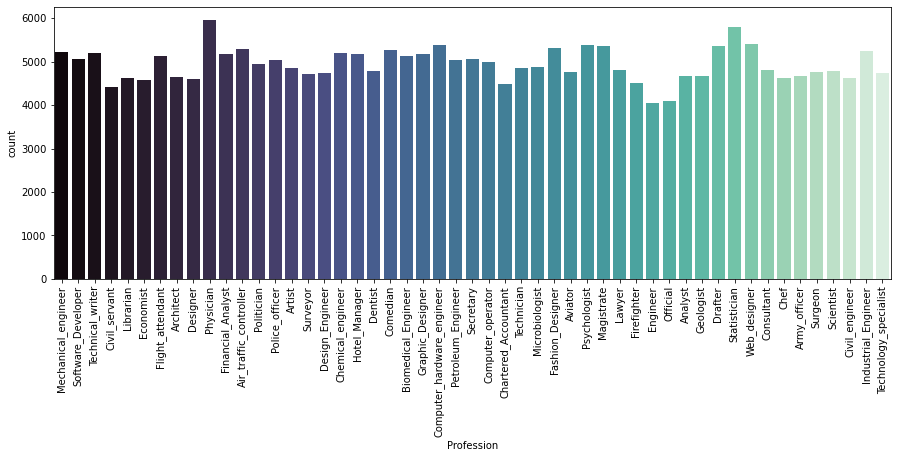

In [9]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x="Profession", data=LoanDF, palette='mako')
plt.show()

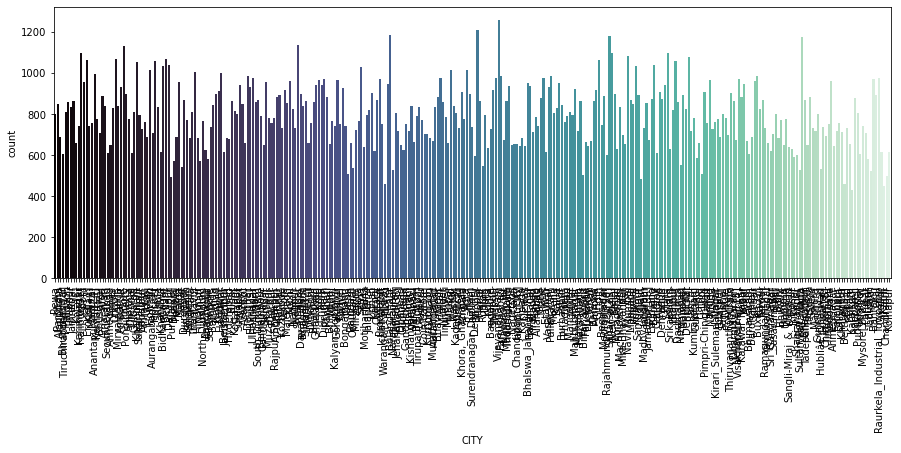

In [10]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x="CITY", data=LoanDF, palette='mako')
plt.show()

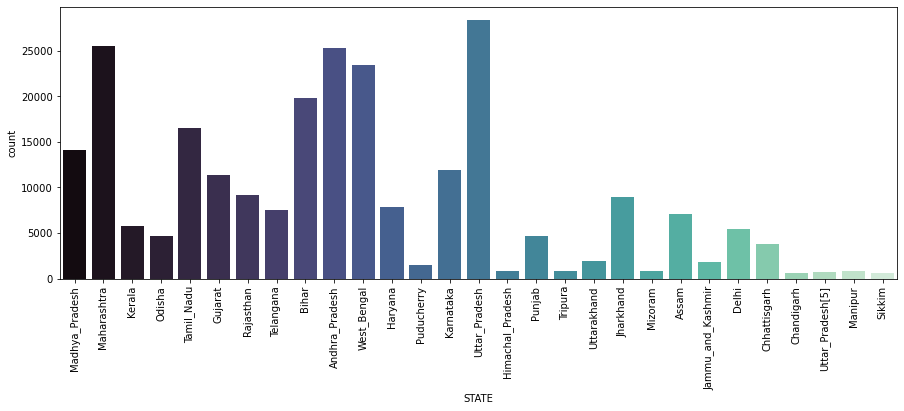

In [11]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x="STATE", data=LoanDF, palette='mako')
plt.show()

Profession, City and State have TOO MANY unique values. We will need eliminate these columns. 

##### Eliminate Columns
Now, we will drop the columns we discussed earlier with the correlation matrix and the variables that have to many unique values to find any meaningful information. 

In [12]:
#Drop columns
NewLoanDF = LoanDF.drop(columns = ['CITY', 'STATE', 'Profession', 'CURRENT_HOUSE_YRS','CURRENT_JOB_YRS', 'Id'])
#View remaining columns
NewLoanDF.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Risk_Flag
0,1303834,23,3,single,rented,no,0
1,7574516,40,10,single,rented,no,0
2,3991815,66,4,married,rented,no,0
3,6256451,41,2,single,rented,yes,1
4,5768871,47,11,single,rented,no,1


In [13]:
#View unique values within candidate predictor categorical variables 
NewLoanDF['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [14]:
#View unique value counts
NewLoanDF['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [15]:
NewLoanDF['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
#View unique value counts
NewLoanDF['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [17]:
NewLoanDF['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [18]:
NewLoanDF['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [19]:
NewLoanDF['Risk_Flag'].unique()

array([0, 1], dtype=int64)

In [20]:
NewLoanDF['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

There is a low incidence of a customer defaulting. We will need to resolve this issue prior to training our model.

In [21]:
#Change column headings to consistent format
NewLoanDF = NewLoanDF.rename({'House_Ownership':'Home Ownership', 'Car_Ownership':'Car Ownership', 'Risk_Flag':'Risk Flag'}, axis='columns')

In [22]:
#Check to see if columns were renamed
NewLoanDF.head()

,Income,Age,Experience,Married/Single,Home Ownership,Car Ownership,Risk Flag
0,1303834,23,3,single,rented,no,0
1,7574516,40,10,single,rented,no,0
2,3991815,66,4,married,rented,no,0
3,6256451,41,2,single,rented,yes,1
4,5768871,47,11,single,rented,no,1


##### Dummy Code

In [23]:
#Dummy code categorical variables 
features = ["Income", "Age", "Experience", "Married/Single", "Home Ownership", "Car Ownership", "Risk Flag"]
NewLoanDF = pd.get_dummies(NewLoanDF[features])
print(NewLoanDF)

         Income  Age  Experience  Risk Flag  Married/Single_married  \
0       1303834   23           3          0                       0   
1       7574516   40          10          0                       0   
2       3991815   66           4          0                       1   
3       6256451   41           2          1                       0   
4       5768871   47          11          1                       0   
...         ...  ...         ...        ...                     ...   
251995  8154883   43          13          0                       0   
251996  2843572   26          10          0                       0   
251997  4522448   46           7          0                       0   
251998  6507128   45           0          0                       0   
251999  9070230   70          17          0                       0   

        Married/Single_single  Home Ownership_norent_noown  \
0                           1                            0   
1                      

In [24]:
#Drop redundant columns
NewLoanDF = NewLoanDF.drop(columns = ['Married/Single_single', 'Car Ownership_no', 'Home Ownership_norent_noown', 'Home Ownership_rented'])
NewLoanDF.head()

,Income,Age,Experience,Risk Flag,Married/Single_married,Home Ownership_owned,Car Ownership_yes
0,1303834,23,3,0,0,0,0
1,7574516,40,10,0,0,0,0
2,3991815,66,4,0,1,0,0
3,6256451,41,2,1,0,0,1
4,5768871,47,11,1,0,0,0


In [25]:
#View sample of new dataset
NewLoanDF.sample(10)

,Income,Age,Experience,Risk Flag,Married/Single_married,Home Ownership_owned,Car Ownership_yes
164795,8901361,55,12,0,0,0,0
22130,1097615,59,15,0,1,0,0
29512,2153305,21,11,0,0,0,1
118816,3540135,78,4,0,0,0,0
176321,1489858,24,16,0,0,1,1
199677,676370,69,11,0,0,0,1
141245,4408094,30,8,0,0,0,1
34688,6547688,27,5,1,0,0,1
105192,1845417,45,10,0,0,0,1
10748,6915937,64,0,0,0,0,0


In [26]:
#View new dummy code value countsto ensure they correlate with original value counts
#Rented and no own/ no rent should total the count for 0's indicating that they do not own a home. 
NewLoanDF['Home Ownership_owned'].value_counts() 

0    239082
1     12918
Name: Home Ownership_owned, dtype: int64

In [27]:
NewLoanDF['Married/Single_married'].value_counts()

0    226272
1     25728
Name: Married/Single_married, dtype: int64

In [28]:
NewLoanDF['Car Ownership_yes'].value_counts()

0    176000
1     76000
Name: Car Ownership_yes, dtype: int64

##### Rename Columns
Now we will tidy up the dataset to make it easier to use. 
We will rename new columns. 

Dummy Code Interpretation: 

Married/Single column: 1=married and 0=single 

Car Ownership: 1=owns car and  0 = doesn't own a car 

Home ownership: 1=owns home and 0 = doesn't own a home

In [29]:
NewLoanDF = NewLoanDF.rename({'Married/Single_married':'Married/Single', 'Car Ownership_yes':
                              'Car Ownership', 'Home Ownership_owned':'Home Ownership' }, axis='columns')

In [30]:
#Check new column headings
NewLoanDF.head()

,Income,Age,Experience,Risk Flag,Married/Single,Home Ownership,Car Ownership
0,1303834,23,3,0,0,0,0
1,7574516,40,10,0,0,0,0
2,3991815,66,4,0,1,0,0
3,6256451,41,2,1,0,0,1
4,5768871,47,11,1,0,0,0


<AxesSubplot:>

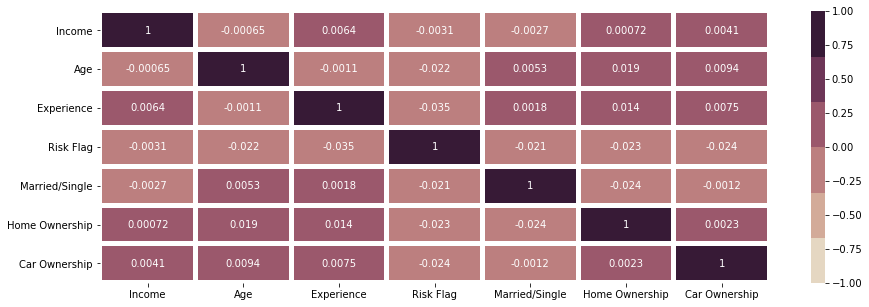

In [31]:
#View new correlation matrix
#Check correlation 

plt.figure(figsize=(15,5))
sns.heatmap(NewLoanDF.corr(), vmin=-1, vmax=1, linewidth = 4, annot=True, cmap=sns.color_palette("ch:.25") )

In [32]:
#Save clean data to new csv file
NewLoanDF.to_csv('NewLoanData.csv',index=False)

Now, we can explore our clean new dataset!

# Data Exploration

In [33]:
#View pairplots
#sns.pairplot(NewLoanDF)

### Income 

<AxesSubplot:xlabel='Income'>

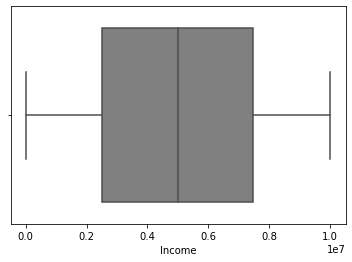

In [34]:
sns.boxplot(x="Income", data=NewLoanDF, color="gray")

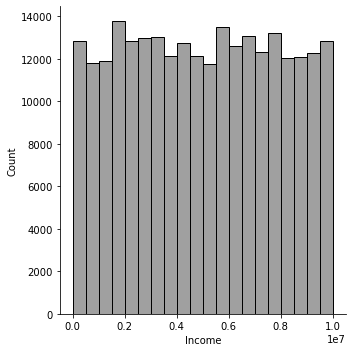

In [35]:
sns.displot(x="Income",data=NewLoanDF, bins=20, color="gray")

We can infer that income range is pretty evenly distributed in our dataset. 

### Age

<AxesSubplot:xlabel='Age'>

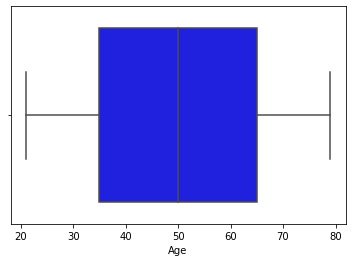

In [36]:
sns.boxplot(x=NewLoanDF.Age, color="blue")

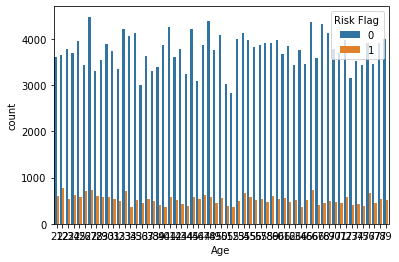

In [37]:
sns.countplot(x='Age', data=NewLoanDF, hue="Risk Flag");

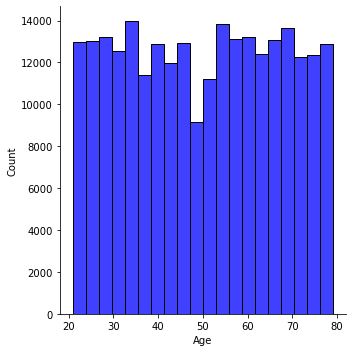

In [38]:
sns.displot(x="Age",data=NewLoanDF, bins=20, color="blue")

In [39]:
# Create a pivot table
pd.pivot_table(NewLoanDF, index = "Age", columns="Risk Flag", aggfunc='size')

Risk Flag,0,1
Age,,
21,3607,598
22,3660,770
23,3786,536
24,3695,631
25,3959,584
26,3437,719
27,4477,720
28,3299,602
29,3540,569


We can infer that borrowers are relatively evenly distributed across ages. Defaults appear to be relatively equally distributed across ages. 

### Experience

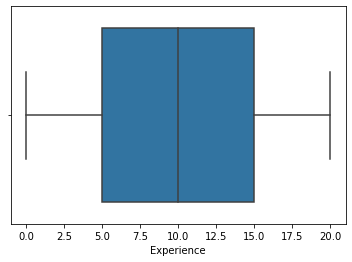

In [40]:
sns.boxplot(x=NewLoanDF.Experience);

<AxesSubplot:xlabel='Risk Flag', ylabel='Experience'>

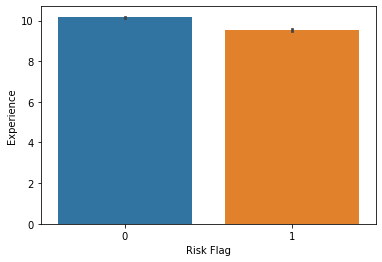

In [41]:
sns.barplot(x=NewLoanDF["Risk Flag"], y=NewLoanDF["Experience"])

We can infer that defaulters tend to have slightly less experience than who do not default.

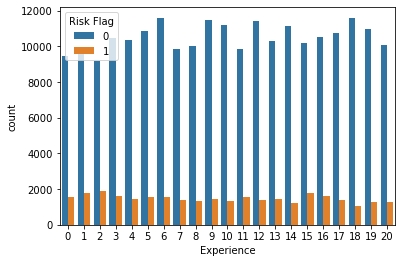

In [42]:
sns.countplot(x='Experience', data=NewLoanDF, hue="Risk Flag");

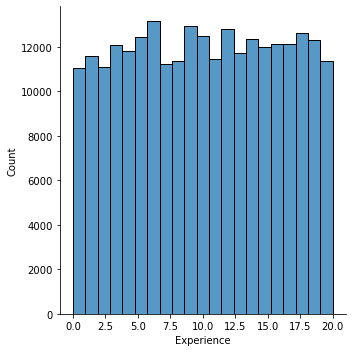

In [43]:
sns.displot(x="Experience",data=NewLoanDF, bins=21)

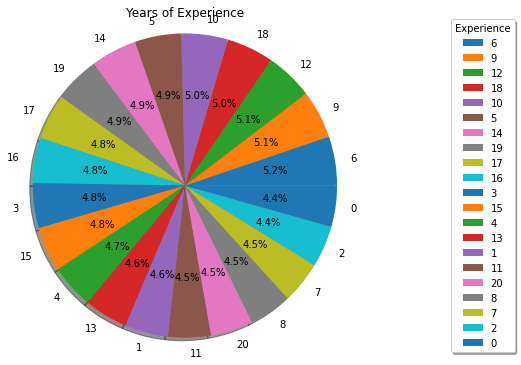

In [44]:
label = NewLoanDF["Experience"].value_counts().index
count = NewLoanDF['Experience'].value_counts().values

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(count, labels=label, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.legend(fancybox=True,title="Experience", shadow=True,loc="upper right",bbox_to_anchor=(1.5,1.025) )
ax.set_title("Years of Experience")
plt.show()

We can infer that we have a proportional number of datapoints for various ages

In [45]:
# Create a pivot table
pd.pivot_table(NewLoanDF, index = "Experience", columns="Risk Flag", aggfunc='size')

Risk Flag,0,1
Experience,,
0,9461,1582
1,9773,1802
2,9197,1890
3,10483,1586
4,10358,1449
5,10876,1565
6,11601,1557
7,9829,1403
8,10016,1334


### Risk Flag

In [46]:
NewLoanDF['Risk Flag'].value_counts()

0    221004
1     30996
Name: Risk Flag, dtype: int64

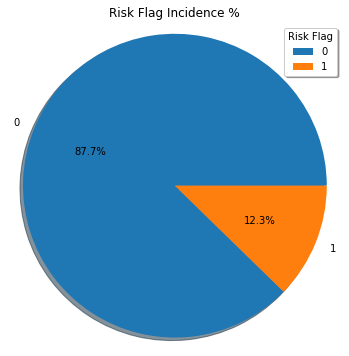

In [47]:
label = NewLoanDF["Risk Flag"].value_counts().index
count = NewLoanDF['Risk Flag'].value_counts().values

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(count, labels=label, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.legend(fancybox=True,title="Risk Flag", shadow=True)
ax.set_title("Risk Flag Incidence %")
plt.show()

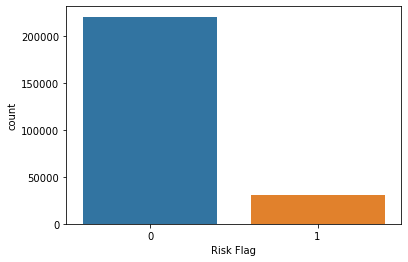

In [48]:
sns.countplot(x='Risk Flag', data=NewLoanDF);

Our dataset has a low incidence of defaults in our dataset. Roughly 12% of datapoints represent actual defaults. 88% of our data are non-defaulters. We will need to address the imbalanced data issue later. 

### Home Ownership

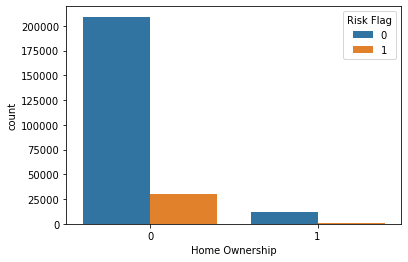

In [49]:
sns.countplot(x='Home Ownership', hue='Risk Flag', data=NewLoanDF);

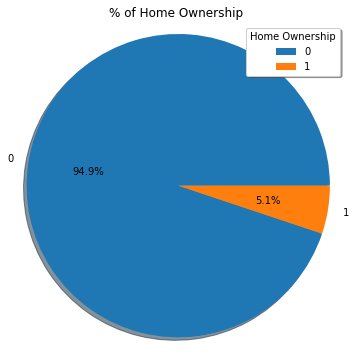

In [50]:
label = NewLoanDF["Home Ownership"].value_counts().index
count = NewLoanDF['Home Ownership'].value_counts().values

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(count, labels=label, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.legend(fancybox=True,title="Home Ownership", shadow=True)
ax.set_title("% of Home Ownership ")
plt.show()

In [51]:
# Create a pivot table
pd.pivot_table(NewLoanDF, index = "Home Ownership", columns="Risk Flag", aggfunc='size')

Risk Flag,0,1
Home Ownership,,
0,209246,29836
1,11758,1160


### Married / Single

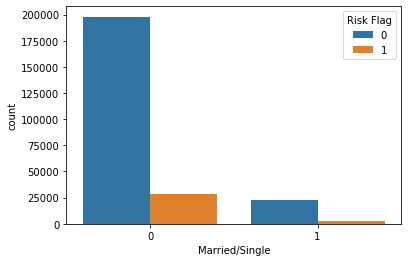

In [52]:
sns.countplot(x='Married/Single', hue='Risk Flag', data=NewLoanDF);

We can infer that single people in our dataset are more likely to default than married people.

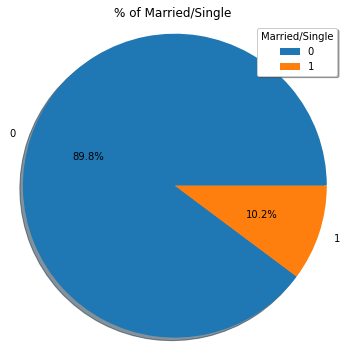

In [53]:
label = NewLoanDF["Married/Single"].value_counts().index
count = NewLoanDF['Married/Single'].value_counts().values

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(count, labels=label, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.legend(fancybox=True,title="Married/Single", shadow=True)
ax.set_title("% of Married/Single ")
plt.show()

In [54]:
# Create a pivot table
pd.pivot_table(NewLoanDF, index ="Married/Single", columns="Risk Flag", aggfunc='size')

Risk Flag,0,1
Married/Single,,
0,197912,28360
1,23092,2636


### Car Ownership

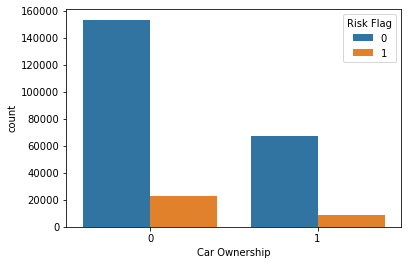

In [55]:
sns.countplot(x='Car Ownership', hue='Risk Flag', data=NewLoanDF);

We can infer that those who don't own a car in our dataset are more likely to default than car owners. 

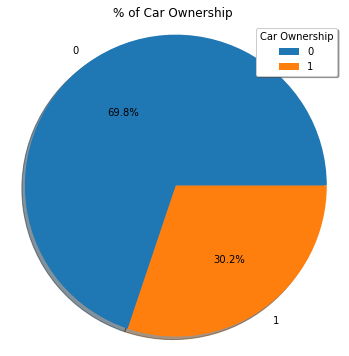

In [56]:
label = NewLoanDF["Car Ownership"].value_counts().index
count = NewLoanDF['Car Ownership'].value_counts().values

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(count, labels=label, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
ax.legend(fancybox=True,title="Car Ownership", shadow=True)
ax.set_title("% of Car Ownership ")
plt.show()

In [57]:
# Create a pivot table
pd.pivot_table(NewLoanDF, index ="Car Ownership", columns="Risk Flag", aggfunc='size')

Risk Flag,0,1
Car Ownership,,
0,153439,22561
1,67565,8435


## Cleaned Data Split

In [58]:
# Read in cleaned dataset
credit = pd.read_csv("NewLoanData.csv")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Income          252000 non-null  int64
 1   Age             252000 non-null  int64
 2   Experience      252000 non-null  int64
 3   Risk Flag       252000 non-null  int64
 4   Married/Single  252000 non-null  int64
 5   Home Ownership  252000 non-null  int64
 6   Car Ownership   252000 non-null  int64
dtypes: int64(7)
memory usage: 13.5 MB


In [59]:
# Create X and Y variables

X = credit.drop("Risk Flag", axis=1)
y = credit["Risk Flag"]

In [60]:
# Split using stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [61]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (201600, 6)
X_test shape: (50400, 6)


In [62]:
# Default rates?
print(f"Training Default Rate is:   {y_train.mean():.2%}")
print(f"Test Default Rate is:       {y_test.mean():.2%}")

Training Default Rate is:   12.30%
Test Default Rate is:       12.30%


Text(0.5, 1.0, 'Dataset before SMOTE')

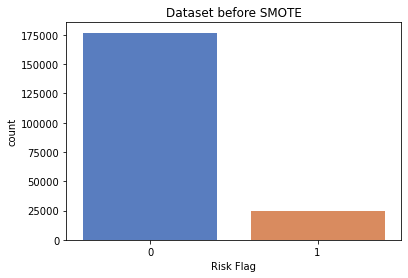

In [63]:
# Plot the imbalance
ax=sns.countplot(x = y_train, palette = 'muted')
ax.set_title('Dataset before SMOTE')

# SMOTE for Imbalance Classification

In [64]:
from imblearn.over_sampling import SMOTE


print ('Number of observations in the target variable before oversampling:', np.bincount(y_train) )

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling:', np.bincount(y_train) )

Number of observations in the target variable before oversampling: [176803  24797]

Number of observations in the target variable after oversampling: [176803 176803]


Text(0.5, 1.0, 'Dataset after oversampling')

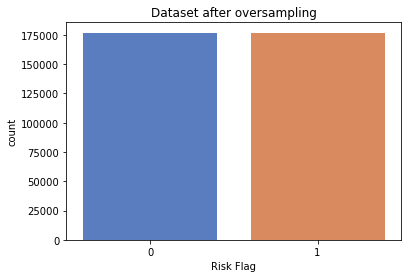

In [65]:
# Plot the balance
ax=sns.countplot(x = y_train, palette = 'muted')
ax.set_title('Dataset after oversampling')


In [66]:
# What is the default rate in training and test sets after SMOTE?
print(f"Training default rate is {y_train.mean():.2%}")
print(f"Test default rate is     {y_test.mean():.2%}")

Training default rate is 50.00%
Test default rate is     12.30%


In [67]:
#Scale the data 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Logistic Regression


In [69]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [70]:
# Prob Estimates
lr.predict_proba(X_test_std)

array([[0.54193876, 0.45806124],
       [0.54489919, 0.45510081],
       [0.44899403, 0.55100597],
       ...,
       [0.43631291, 0.56368709],
       [0.48086676, 0.51913324],
       [0.57024432, 0.42975568]])

In [71]:
# Class Labels (0 or 1)
lr.predict(X_test_std)

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [72]:
# Confusion Matrix
confusion_matrix(y_test, lr.predict(X_test_std))

array([[21815, 22386],
       [ 2660,  3539]], dtype=int64)

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


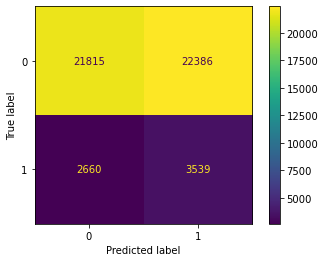

In [74]:
plot_confusion_matrix(lr, X_test_std, y_test, values_format="d")

In [75]:
truN, falP, falN, truP = confusion_matrix(y_test, lr.predict(X_test_std)).ravel()
print(f"True Negative: {truN}")
print(f"False Positive: {falP}")
print(f"False Negative: {falN}")
print(f"True Positive: {truP}")

True Negative: 21815
False Positive: 22386
False Negative: 2660
True Positive: 3539


In [76]:
# Accuracy
print(f'Overall Accuracy: {(truN+truP)/len(y_test):.2%}')

Overall Accuracy: 50.31%


In [77]:
# Error Rate
print(f"Error Rate: {1 - accuracy_score(y_test, lr.predict(X_test_std)):.2%}")

Error Rate: 49.69%


In [78]:
print(classification_report(y_test, lr.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.89      0.49      0.64     44201
         Yes       0.14      0.57      0.22      6199

    accuracy                           0.50     50400
   macro avg       0.51      0.53      0.43     50400
weighted avg       0.80      0.50      0.58     50400



C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


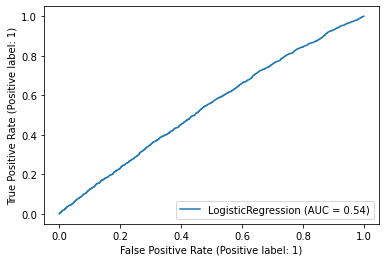

In [79]:
plot_roc_curve(lr, X_test_std, y_test)

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


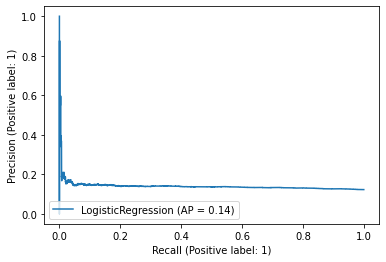

In [80]:
plot_precision_recall_curve(lr, X_test_std, y_test)

## KNearest Neighbors

In [81]:
# k=5
k5 = KNeighborsClassifier(n_neighbors=5)
k5.fit(X_train_std, y_train)

KNeighborsClassifier()

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


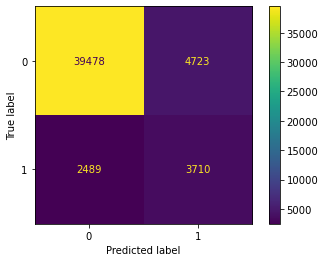

In [82]:
# Plot confusion matrix
confusion_matrix(y_test, k5.predict(X_test_std))
plot_confusion_matrix(k5, X_test_std, y_test)

In [83]:
print(classification_report(y_test, k5.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.94      0.89      0.92     44201
         Yes       0.44      0.60      0.51      6199

    accuracy                           0.86     50400
   macro avg       0.69      0.75      0.71     50400
weighted avg       0.88      0.86      0.87     50400



C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


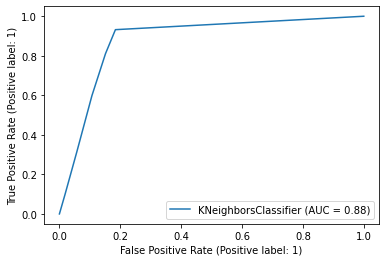

In [84]:
plot_roc_curve(k5, X_test_std, y_test)

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


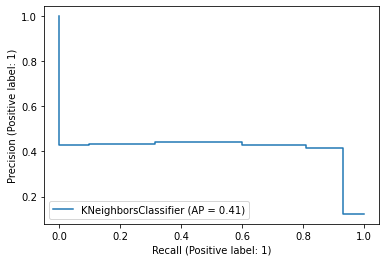

In [85]:
plot_precision_recall_curve(k5, X_test_std, y_test)

## CV for KNN using GridSearchCV

In [86]:
knn_base = KNeighborsClassifier()
scaler2 = StandardScaler().fit(X)
X_s = scaler2.transform(X)
param_grid = {"n_neighbors":np.arange(2,16)}

In [87]:
knnCV = GridSearchCV(knn_base, param_grid, cv=5, scoring="recall")

In [88]:
#knnCV.fit(X_s, y)
#knnCV.best_score_
#knnCV.best_estimator_

#### CV for KNN using 'GridSearch' was unable to be done because of the time to run the code was greater then an hour. We also tried different ranges for the grid search as well. 

## Linear Discriminant Analysis

In [89]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)

LinearDiscriminantAnalysis()

In [90]:
confusion_matrix(y_test, lda.predict(X_test_std))

array([[21750, 22451],
       [ 2648,  3551]], dtype=int64)

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


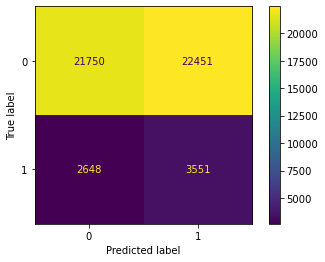

In [91]:
plot_confusion_matrix(lda, X_test_std, y_test)

In [92]:
print(classification_report(y_test, lda.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.89      0.49      0.63     44201
         Yes       0.14      0.57      0.22      6199

    accuracy                           0.50     50400
   macro avg       0.51      0.53      0.43     50400
weighted avg       0.80      0.50      0.58     50400



In [94]:
print(f"Recall Score: {recall_score(y_test, lda.predict(X_test_std)):.2%}")
print(f"Precision Score: {precision_score(y_test, lda.predict(X_test_std)):.2%}")

print(f" ROC AUC Score: {roc_auc_score(y_test, lda.predict_proba(X_test_std)[:,1]):.2%}")
print(f" ROC AUC Score: {average_precision_score(y_test, lda.predict_proba(X_test_std)[:,1]):.2%}")

Recall Score: 57.28%
Precision Score: 13.66%
 ROC AUC Score: 54.20%
 ROC AUC Score: 14.07%


In [95]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, lda.predict(X_test_std)).ravel()
print(f"True Negative: {tn2}")
print(f"False Positive: {fp2}")
print(f"False Negative: {fn2}")
print(f"True Positive: {tp2}")
print(f'Overall Accuracy: {(tn2+tp2)/len(y_test):.2%}')

True Negative: 21750
False Positive: 22451
False Negative: 2648
True Positive: 3551
Overall Accuracy: 50.20%


C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


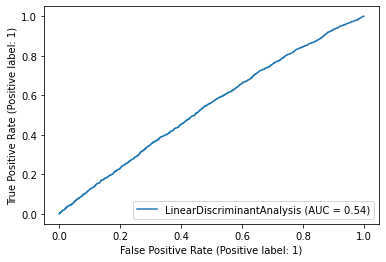

In [96]:
plot_roc_curve(lda, X_test_std, y_test)

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


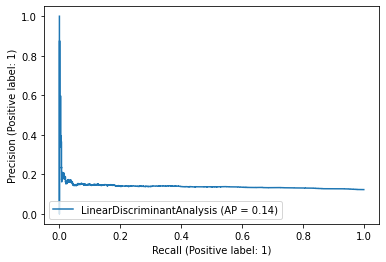

In [97]:
plot_precision_recall_curve(lda, X_test_std, y_test)

## Quadratic Discriminant Analysis

In [98]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_std, y_train)

QuadraticDiscriminantAnalysis()

In [99]:
confusion_matrix(y_test, qda.predict(X_test_std))

array([[10624, 33577],
       [ 1141,  5058]], dtype=int64)

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


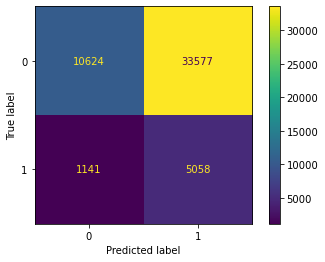

In [100]:
plot_confusion_matrix(qda, X_test_std, y_test)

In [101]:
print(classification_report(y_test, qda.predict(X_test_std), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.90      0.24      0.38     44201
         Yes       0.13      0.82      0.23      6199

    accuracy                           0.31     50400
   macro avg       0.52      0.53      0.30     50400
weighted avg       0.81      0.31      0.36     50400



In [102]:
print(f"Recall Score: {recall_score(y_test, qda.predict(X_test_std)):.2%}")
print(f"Precision Score: {precision_score(y_test, qda.predict(X_test_std)):.2%}")

print(f" ROC AUC Score: {roc_auc_score(y_test, qda.predict_proba(X_test_std)[:,1]):.2%}")
print(f" ROC AUC Score: {average_precision_score(y_test, qda.predict_proba(X_test_std)[:,1]):.2%}")

Recall Score: 81.59%
Precision Score: 13.09%
 ROC AUC Score: 54.17%
 ROC AUC Score: 13.97%


C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


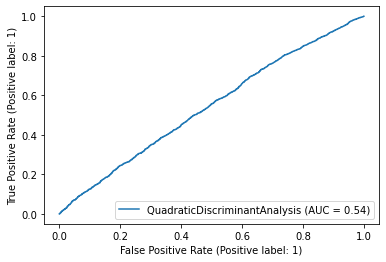

In [103]:
plot_roc_curve(qda, X_test_std, y_test)

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


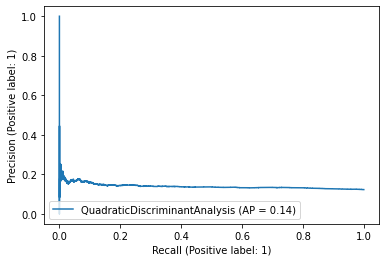

In [104]:
plot_precision_recall_curve(qda, X_test_std, y_test)

## Decision Tree Model


In [105]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std,y_train)
dt_predict = dt.predict(X_test_std)

In [106]:
print(f'Accuracy Score: {accuracy_score (y_test, dt_predict):.2f}')
print(f'AUC Score: {roc_auc_score (y_test, dt_predict):.2f}')
print(f'F1 Score: {f1_score(y_test,dt_predict):.2f}')
print(f'Recall Score: {recall_score(y_test,dt_predict):.2f}')


Accuracy Score: 0.86
AUC Score: 0.86
F1 Score: 0.60
Recall Score: 0.86


In [107]:
print(classification_report(y_test, dt_predict, target_names=["No", "Yes"]))


              precision    recall  f1-score   support

          No       0.98      0.86      0.91     44201
         Yes       0.46      0.86      0.60      6199

    accuracy                           0.86     50400
   macro avg       0.72      0.86      0.76     50400
weighted avg       0.91      0.86      0.88     50400



<AxesSubplot:>

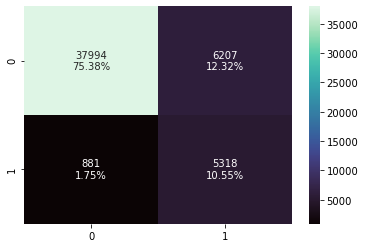

In [108]:
dt_cfm = confusion_matrix(y_test,dt_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                dt_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     dt_cfm.flatten()/np.sum(dt_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dt_cfm, annot=labels, fmt='', cmap='mako')

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


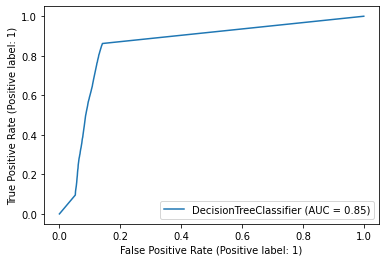

In [109]:
plot_roc_curve(dt, X_test_std, y_test)

C:\Users\chbow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


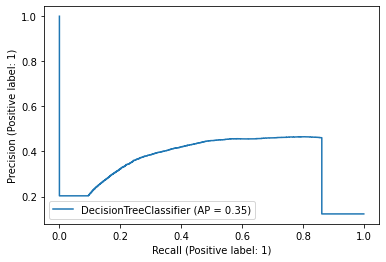

In [110]:
plot_precision_recall_curve(dt, X_test_std, y_test)


## K Fold Decision Tree

In [111]:
# Let's try K=5 fold CV
folds = 5
dtCV = DecisionTreeClassifier()
cvRecall = cross_val_score(dtCV, X, y, cv=folds, scoring='recall')
cvR2 = cross_val_score(dtCV, X, y, cv=folds)

print(cvRecall)

[0.63429585 0.63607033 0.75076625 0.60638813 0.29177419]


In [112]:
totDefaulters = y_test.sum()
totNonDefaulters = len(y_test) - totDefaulters

## Threshold Manipulation


In [113]:
threshold = 0.3
yProb = dt.predict_proba(X_test_std)
print(yProb)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [114]:
tempDF = pd.DataFrame({"True Default Status": y_test, "Predicted Default Status": yProb[:,1]>threshold})
tempDF.sample(11)

,True Default Status,Predicted Default Status
45365,0,True
246026,0,True
239751,0,False
148490,1,True
214799,0,False
228353,0,False
41872,0,False
82752,0,False
85298,0,False
141169,0,False


In [115]:
tempDF.replace(to_replace={0:"No", 1:"Yes", "True":"Yes", "False":"No"},inplace=True)
tempDF.sample(11)

,True Default Status,Predicted Default Status
152893,No,No
228458,No,Yes
16275,No,No
23354,No,No
62853,No,No
192056,No,Yes
31136,No,No
139918,No,No
131380,No,No
159248,No,No


In [116]:
# Find true negative
TN = len(tempDF[(tempDF["True Default Status"]=="No") & (tempDF["Predicted Default Status"]=="No")])
print(TN)

37959


In [117]:
# Find false negative
FN = len(tempDF[(tempDF["True Default Status"]=="No") & (tempDF["Predicted Default Status"]=="Yes")])
print(FN)

6242


In [118]:
# False positive
FP = len(tempDF[(tempDF["True Default Status"]=="Yes") & (tempDF["Predicted Default Status"]=="No")]) 
print(FP)

859


In [119]:
# True positive
TP = len(tempDF[(tempDF["True Default Status"]=="Yes") & (tempDF["Predicted Default Status"]=="Yes")]) 
print(TP)

5340


In [120]:
# Overall Error Rate and Accuracy for threshold of 0.2
print((FN+FP)/len(y_test))

0.14089285714285715


In [121]:
# Look at non-defaulters
print(FN/totNonDefaulters)

0.14121852446777222


In [122]:
# Look at defaulters
print(FP/totDefaulters)

0.13857073721567995


In [123]:
tempDF.groupby(["Predicted Default Status", "True Default Status"]).size().unstack("Predicted Default Status")


Predicted Default Status,No,Yes
True Default Status,,
No,37959,6242
Yes,859,5340


## Random Forest Classifer Prediction

In [124]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_std,y_train)
rfc_predict = rfc.predict(X_test_std)

In [125]:
print(f'Accuracy Score: {accuracy_score (y_test, rfc_predict):.2f}')
print(f'AUC Score: {roc_auc_score (y_test, rfc_predict):.2f}')
print(f'F1 Score: {f1_score(y_test,rfc_predict):.2f}')
print(f'Recall Score: {recall_score(y_test,dt_predict):.2f}')

Accuracy Score: 0.86
AUC Score: 0.86
F1 Score: 0.60
Recall Score: 0.86


<AxesSubplot:>

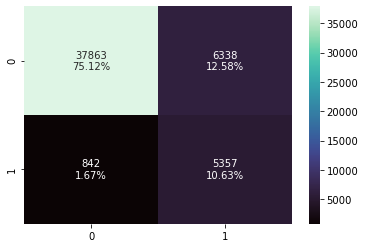

In [126]:
rfc_cfm = confusion_matrix(y_test,rfc_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                rfc_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     rfc_cfm.flatten()/np.sum(rfc_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfc_cfm, annot=labels, fmt='', cmap='mako')

In [127]:
print(classification_report(y_test, rfc.predict(X_test_std), 
                           target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.98      0.86      0.91     44201
         Yes       0.46      0.86      0.60      6199

    accuracy                           0.86     50400
   macro avg       0.72      0.86      0.76     50400
weighted avg       0.91      0.86      0.87     50400



## Random Forest Threshold Manipulation

In [128]:
threshold = 0.3
yProb = rfc.predict_proba(X_test_std)
print(yProb)

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.42 0.58]
 [1.   0.  ]
 [1.   0.  ]]


In [129]:
tempDF2 = pd.DataFrame({"True Default Status": y_test, "Predicted Default Status": yProb[:,1]>threshold})
tempDF2.sample(11)

,True Default Status,Predicted Default Status
251766,0,True
52009,0,False
242161,0,False
126979,0,False
227833,0,False
35509,0,False
9884,0,False
89487,0,False
164022,0,False
46502,0,False


In [130]:
tempDF2.replace(to_replace={0:"No", 1:"Yes", "True":"Yes", "False":"No"},inplace=True)
tempDF2.sample(11)

,True Default Status,Predicted Default Status
220154,No,Yes
168956,No,No
122039,No,No
241705,No,Yes
243539,No,Yes
25256,No,No
214946,No,No
88163,Yes,Yes
185175,No,No
64230,No,No


In [131]:
tn = len(tempDF2[(tempDF2["True Default Status"]=="No") & (tempDF2["Predicted Default Status"]=="No")])
print(tn)

36649


In [132]:
fn = len(tempDF2[(tempDF2["True Default Status"]=="No") & (tempDF2["Predicted Default Status"]=="Yes")])
print(fn)

7552


In [133]:
fp = len(tempDF2[(tempDF2["True Default Status"]=="Yes") & (tempDF2["Predicted Default Status"]=="No")]) 
print(fp)

548


In [134]:
tp = len(tempDF2[(tempDF2["True Default Status"]=="Yes") & (tempDF["Predicted Default Status"]=="Yes")]) 
print(tp)

5340


In [135]:
print((fn+fp)/len(y_test))

0.16071428571428573


In [136]:
print(fn/totNonDefaulters)

0.17085586298952513


In [137]:
print(fp/totDefaulters)

0.0884013550572673


In [138]:
# RFC  Model with threshold of .3
tempDF2.groupby(["Predicted Default Status", "True Default Status"]).size().unstack("Predicted Default Status")

Predicted Default Status,No,Yes
True Default Status,,
No,36649,7552
Yes,548,5651


In [139]:
tempDF2.shape

(50400, 2)

In [140]:
# DCT Model with threshold of .3
tempDF.groupby(["Predicted Default Status", "True Default Status"]).size().unstack("Predicted Default Status")

Predicted Default Status,No,Yes
True Default Status,,
No,37959,6242
Yes,859,5340


## K Fold Random Forest


In [141]:
#folds = 5
#rfcCV = RandomForestClassifier()
#cv_Recall = cross_val_score(rfcCV, X, y, cv=folds, scoring='recall')
#cv_R2 = cross_val_score(rfcCV, X, y, cv=folds)

#print(cvRecall)

## So the best model is Random Forest Classifier
RFC with a threshold of 0.3 resulted in the best model over decision tree model.


## So here is the best model for this dataset

In [142]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train_std,y_train)
rfc2_proba = rfc2.predict_proba(X_test_std)

threshold = 0.3
rfc2_predict = (rfc2_proba[:,1]>= threshold)

<AxesSubplot:>

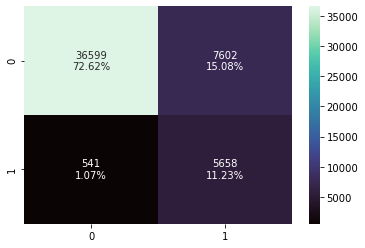

In [143]:
rfc2_cfm = confusion_matrix(y_test,rfc2_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                rfc2_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     rfc2_cfm.flatten()/np.sum(rfc2_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfc2_cfm, annot=labels, fmt='', cmap='mako')